# Computational Quantum Mechanics Basics: Statics


In [7]:
import numpy as np
from matplotlib import pyplot as plt

L = 10.0
N = 1024
X = np.linspace(-L/2,L/2,N,endpoint=False)
dX = L/N

def norm(phi):
	return np.sqrt(np.sum(np.abs(phi)**2)*dX)

In [9]:
ksi = np.exp(1j*X*(2*np.pi/L))

def com(phi):
	rho = np.abs(phi)**2
	c = np.sum(ksi*rho)
	return (L/(2*np.pi))*np.angle(c)

In [3]:
f = np.fft.fftfreq(N,dX)
p = 2*np.pi*f

def avg_momentum(phi):
	phi_k = np.fft.fft(phi,norm="ortho")
	return np.sum(phi_k.conj()*p*phi_k).real*dX
	#return np.sum((-0.5j)*phi.conj()*(np.roll(phi,1)-np.roll(phi,-1))).real

In [5]:
def gaussian(x0,s,p):
	y = (X-x0)/s
	phi = np.exp(-y**2)*np.exp(1j*(X-x0)*p)
	phi /= norm(phi)
	return phi

### Schrödinger equation: time evolution of a quantum state

$$ \frac{\partial \phi}{\partial t} = -i H \phi $$

here: $H=-\frac{\hbar^2}{2m}\frac{\partial}{\partial x}$

In [2]:
def euler_drift(phi_x,T):
	D = (0.5j/dX/dX)*(np.roll(phi_x,1)+np.roll(phi_x,-1)-2*phi_x)
	return phi_x+D*T

norm(phi_0) = 1 x = -2.96423e-17 p = 1


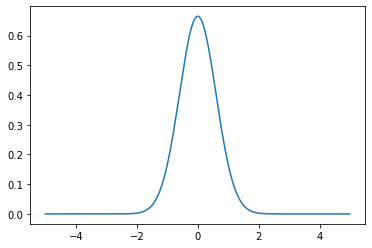

In [10]:
phi_0 = gaussian(0,1.2,1.0)
print("norm(phi_0) = {:g} x = {:g} p = {:g}".format(norm(phi_0),com(phi_0),avg_momentum(phi_0)))

rho = np.abs(phi_0)**2
plt.plot(X,rho)

In [11]:
def evolve(drift):
    phi_T = phi_0.copy()
    NT = 10
    T = 1.0
    DT = T/NT
    t = 0.0
    for _ in range(NT):
        phi_T = drift(phi_T,DT)
        print("norm(phi_T) = {:g} x = {:g} p = {:g}".format(norm(phi_T),com(phi_T),avg_momentum(phi_T)))

    rho = np.abs(phi_T)**2
    plt.plot(X,rho,ls=":",color="blue")

norm(phi_T) = 1.00823 x = 0.0983221 p = 1.03794
norm(phi_T) = 1.01729 x = 0.200869 p = 1.08114
norm(phi_T) = 10.2509 x = 4.99217 p = -198.857
norm(phi_T) = 19734.6 x = 4.99512 p = -8.05416e+08
norm(phi_T) = 3.89441e+07 x = 4.99512 p = -3.34902e+15
norm(phi_T) = 7.77746e+10 x = 4.99512 p = -1.41652e+22
norm(phi_T) = 1.56572e+14 x = 4.99512 p = -6.05298e+28
norm(phi_T) = 3.1702e+17 x = 4.99512 p = -2.60375e+35
norm(phi_T) = 6.44678e+20 x = 4.99512 p = -1.12515e+42
norm(phi_T) = 1.31543e+24 x = 4.99512 p = -4.87801e+48


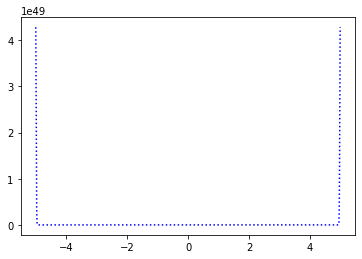

In [12]:
evolve(euler_drift)

In [13]:
K2 = (2.0*np.pi*np.pi)*f*f

def dft_drift(phi_x,T):
	phi_k = np.fft.fft(phi_x)
	phi_k *= np.exp(-1j*T*K2)
	return np.fft.ifft(phi_k)

norm(phi_T) = 1 x = 0.1 p = 1
norm(phi_T) = 1 x = 0.2 p = 1
norm(phi_T) = 1 x = 0.3 p = 1
norm(phi_T) = 1 x = 0.4 p = 1
norm(phi_T) = 1 x = 0.5 p = 1
norm(phi_T) = 1 x = 0.6 p = 1
norm(phi_T) = 1 x = 0.7 p = 1
norm(phi_T) = 1 x = 0.8 p = 1
norm(phi_T) = 1 x = 0.9 p = 1
norm(phi_T) = 1 x = 1 p = 1


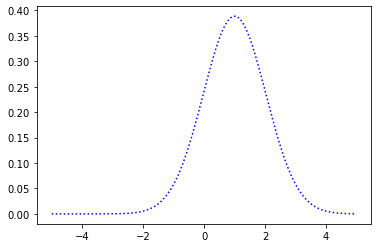

In [14]:
evolve(dft_drift)

# Task 1

For what initial conditions euler and dft evolutions agree with each other?

In [ ]:
# solution 1